#TASK 01  Load the dataset

In [1]:
!pip install pandas requests


In [2]:
import pandas as pd
import numpy as np
import requests


In [3]:
url = "https://api.spacexdata.com/v4/launches"
response = requests.get(url)
data = response.json()

df = pd.json_normalize(data)
df.head()


,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


In [4]:
df = df[['name', 'date_utc', 'rocket', 'success', 'details', 'cores', 'payloads']]
df.head()


,name,date_utc,rocket,success,details,cores,payloads
0,FalconSat,2006-03-24T22:30:00.000Z,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,"[{'core': '5e9e289df35918033d3b2623', 'flight'...",[5eb0e4b5b6c3bb0006eeb1e1]
1,DemoSat,2007-03-21T01:10:00.000Z,5e9d0d95eda69955f709d1eb,False,Successful first stage burn and transition to ...,"[{'core': '5e9e289ef35918416a3b2624', 'flight'...",[5eb0e4b6b6c3bb0006eeb1e2]
2,Trailblazer,2008-08-03T03:34:00.000Z,5e9d0d95eda69955f709d1eb,False,Residual stage 1 thrust led to collision betwe...,"[{'core': '5e9e289ef3591814873b2625', 'flight'...","[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006e..."
3,RatSat,2008-09-28T23:15:00.000Z,5e9d0d95eda69955f709d1eb,True,Ratsat was carried to orbit on the first succe...,"[{'core': '5e9e289ef3591855dc3b2626', 'flight'...",[5eb0e4b7b6c3bb0006eeb1e5]
4,RazakSat,2009-07-13T03:35:00.000Z,5e9d0d95eda69955f709d1eb,True,None,"[{'core': '5e9e289ef359184f103b2627', 'flight'...",[5eb0e4b7b6c3bb0006eeb1e6]


In [5]:
cores_data = pd.json_normalize(df['cores'].explode())
df_cores = cores_data.groupby(level=0).first().add_prefix("core_")

df = df.join(df_cores)
df.head()


,name,date_utc,rocket,success,details,cores,payloads,core_core,core_flight,core_gridfins,core_legs,core_reused,core_landing_attempt,core_landing_success,core_landing_type,core_landpad
0,FalconSat,2006-03-24T22:30:00.000Z,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,"[{'core': '5e9e289df35918033d3b2623', 'flight'...",[5eb0e4b5b6c3bb0006eeb1e1],5e9e289df35918033d3b2623,1.0,False,False,False,False,None,None,None
1,DemoSat,2007-03-21T01:10:00.000Z,5e9d0d95eda69955f709d1eb,False,Successful first stage burn and transition to ...,"[{'core': '5e9e289ef35918416a3b2624', 'flight'...",[5eb0e4b6b6c3bb0006eeb1e2],5e9e289ef35918416a3b2624,1.0,False,False,False,False,None,None,None
2,Trailblazer,2008-08-03T03:34:00.000Z,5e9d0d95eda69955f709d1eb,False,Residual stage 1 thrust led to collision betwe...,"[{'core': '5e9e289ef3591814873b2625', 'flight'...","[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006e...",5e9e289ef3591814873b2625,1.0,False,False,False,False,None,None,None
3,RatSat,2008-09-28T23:15:00.000Z,5e9d0d95eda69955f709d1eb,True,Ratsat was carried to orbit on the first succe...,"[{'core': '5e9e289ef3591855dc3b2626', 'flight'...",[5eb0e4b7b6c3bb0006eeb1e5],5e9e289ef3591855dc3b2626,1.0,False,False,False,False,None,None,None
4,RazakSat,2009-07-13T03:35:00.000Z,5e9d0d95eda69955f709d1eb,True,None,"[{'core': '5e9e289ef359184f103b2627', 'flight'...",[5eb0e4b7b6c3bb0006eeb1e6],5e9e289ef359184f103b2627,1.0,False,False,False,False,None,None,None


In [6]:
payloads_data = pd.json_normalize(df['payloads'].explode())
df_payloads = payloads_data.groupby(level=0).first().add_prefix("payload_")

df = df.join(df_payloads)
df.head()


,name,date_utc,rocket,success,details,cores,payloads,core_core,core_flight,core_gridfins,core_legs,core_reused,core_landing_attempt,core_landing_success,core_landing_type,core_landpad
0,FalconSat,2006-03-24T22:30:00.000Z,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,"[{'core': '5e9e289df35918033d3b2623', 'flight'...",[5eb0e4b5b6c3bb0006eeb1e1],5e9e289df35918033d3b2623,1.0,False,False,False,False,None,None,None
1,DemoSat,2007-03-21T01:10:00.000Z,5e9d0d95eda69955f709d1eb,False,Successful first stage burn and transition to ...,"[{'core': '5e9e289ef35918416a3b2624', 'flight'...",[5eb0e4b6b6c3bb0006eeb1e2],5e9e289ef35918416a3b2624,1.0,False,False,False,False,None,None,None
2,Trailblazer,2008-08-03T03:34:00.000Z,5e9d0d95eda69955f709d1eb,False,Residual stage 1 thrust led to collision betwe...,"[{'core': '5e9e289ef3591814873b2625', 'flight'...","[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006e...",5e9e289ef3591814873b2625,1.0,False,False,False,False,None,None,None
3,RatSat,2008-09-28T23:15:00.000Z,5e9d0d95eda69955f709d1eb,True,Ratsat was carried to orbit on the first succe...,"[{'core': '5e9e289ef3591855dc3b2626', 'flight'...",[5eb0e4b7b6c3bb0006eeb1e5],5e9e289ef3591855dc3b2626,1.0,False,False,False,False,None,None,None
4,RazakSat,2009-07-13T03:35:00.000Z,5e9d0d95eda69955f709d1eb,True,None,"[{'core': '5e9e289ef359184f103b2627', 'flight'...",[5eb0e4b7b6c3bb0006eeb1e6],5e9e289ef359184f103b2627,1.0,False,False,False,False,None,None,None


In [14]:
print(df.columns)


Index(['name', 'date_utc', 'rocket', 'success', 'details', 'cores', 'payloads',
       'core_core', 'core_flight', 'core_gridfins', 'core_legs', 'core_reused',
       'core_landing_attempt', 'core_landing_success', 'core_landing_type',
       'core_landpad'],
      dtype='object')


In [15]:
payloads_data = pd.json_normalize(df['payloads'].explode())
df_payloads = payloads_data.groupby(level=0).first().add_prefix("payload_")
df = df.join(df_payloads)


In [17]:
# Expand payloads JSON
payloads_data = pd.json_normalize(df['payloads'].explode())

# Add prefix for safety
df_payloads = payloads_data.groupby(level=0).first().add_prefix("payload_")

# Join with main df
df = df.join(df_payloads)

# Show new columns
print(df.columns)


Index(['name', 'date_utc', 'rocket', 'success', 'details', 'cores', 'payloads',
       'core_core', 'core_flight', 'core_gridfins', 'core_legs', 'core_reused',
       'core_landing_attempt', 'core_landing_success', 'core_landing_type',
       'core_landpad'],
      dtype='object')


In [18]:
print(df.columns)


Index(['name', 'date_utc', 'rocket', 'success', 'details', 'cores', 'payloads',
       'core_core', 'core_flight', 'core_gridfins', 'core_legs', 'core_reused',
       'core_landing_attempt', 'core_landing_success', 'core_landing_type',
       'core_landpad'],
      dtype='object')


In [19]:
import requests
import pandas as pd

payload_info_list = []

for ids in df['payloads']:
    if isinstance(ids, list) and len(ids) > 0:
        payload_id = ids[0]  # take first payload
        url = f"https://api.spacexdata.com/v4/payloads/{payload_id}"
        res = requests.get(url).json()
        payload_info_list.append(res)
    else:
        payload_info_list.append({})  # empty

# Convert payload list into dataframe
df_payloads = pd.json_normalize(payload_info_list)

# Add prefix to avoid name clashes
df_payloads = df_payloads.add_prefix("payload_")

# Join to main dataframe
df = df.join(df_payloads)

print(df.columns)


Index(['name', 'date_utc', 'rocket', 'success', 'details', 'cores', 'payloads',
       'core_core', 'core_flight', 'core_gridfins', 'core_legs', 'core_reused',
       'core_landing_attempt', 'core_landing_success', 'core_landing_type',
       'core_landpad', 'payload_name', 'payload_type', 'payload_reused',
       'payload_launch', 'payload_customers', 'payload_norad_ids',
       'payload_nationalities', 'payload_manufacturers', 'payload_mass_kg',
       'payload_mass_lbs', 'payload_orbit', 'payload_reference_system',
       'payload_regime', 'payload_longitude', 'payload_semi_major_axis_km',
       'payload_eccentricity', 'payload_periapsis_km', 'payload_apoapsis_km',
       'payload_inclination_deg', 'payload_period_min',
       'payload_lifespan_years', 'payload_epoch', 'payload_mean_motion',
       'payload_raan', 'payload_arg_of_pericenter', 'payload_mean_anomaly',
       'payload_id', 'payload_dragon.capsule',
       'payload_dragon.mass_returned_kg', 'payload_dragon.mass_returne

In [20]:
# STEP 6 — CLEANING

# 1. Fill success values
df['success'] = df['success'].fillna(False)

# 2. Clean payload mass
df['payload_mass_kg'] = df['payload_mass_kg'].fillna(df['payload_mass_kg'].mean())

# 3. Fill missing details
df['details'] = df['details'].fillna("No details available")

# Optional: fill missing orbit with "Unknown"
df['payload_orbit'] = df['payload_orbit'].fillna("Unknown")


In [21]:
final_df = df[[
    'name', 'date_utc', 'success', 'details',
    'core_core', 'core_flight', 'core_reused',
    'core_landing_attempt', 'core_landing_success', 'core_landing_type',
    'payload_mass_kg', 'payload_type', 'payload_orbit'
]]

final_df.head()


,name,date_utc,success,details,core_core,core_flight,core_reused,core_landing_attempt,core_landing_success,core_landing_type,payload_mass_kg,payload_type,payload_orbit
0,FalconSat,2006-03-24T22:30:00.000Z,False,Engine failure at 33 seconds and loss of vehicle,5e9e289df35918033d3b2623,1.0,False,False,None,None,20.000000,Satellite,LEO
1,DemoSat,2007-03-21T01:10:00.000Z,False,Successful first stage burn and transition to ...,5e9e289ef35918416a3b2624,1.0,False,False,None,None,7842.388855,Satellite,LEO
2,Trailblazer,2008-08-03T03:34:00.000Z,False,Residual stage 1 thrust led to collision betwe...,5e9e289ef3591814873b2625,1.0,False,False,None,None,7842.388855,Satellite,LEO
3,RatSat,2008-09-28T23:15:00.000Z,True,Ratsat was carried to orbit on the first succe...,5e9e289ef3591855dc3b2626,1.0,False,False,None,None,165.000000,Satellite,LEO
4,RazakSat,2009-07-13T03:35:00.000Z,True,No details available,5e9e289ef359184f103b2627,1.0,False,False,None,None,200.000000,Satellite,LEO


In [22]:
final_df.to_csv("spacex_cleaned.csv", index=False)


<Axes: title={'center': 'Launch Success Count'}, xlabel='success'>

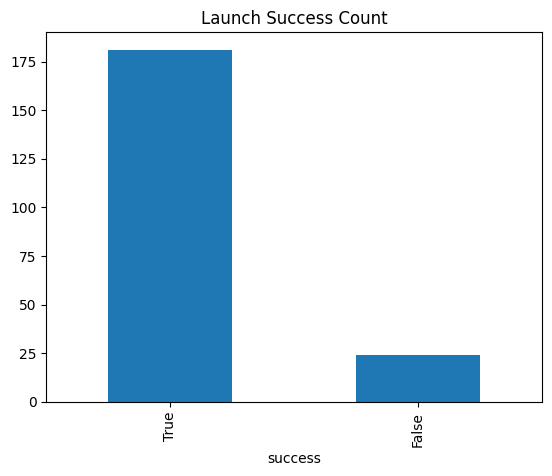

In [23]:
final_df['success'].value_counts().plot(kind='bar', title='Launch Success Count')


<Axes: title={'center': 'Booster Flight Count Distribution'}, ylabel='Frequency'>

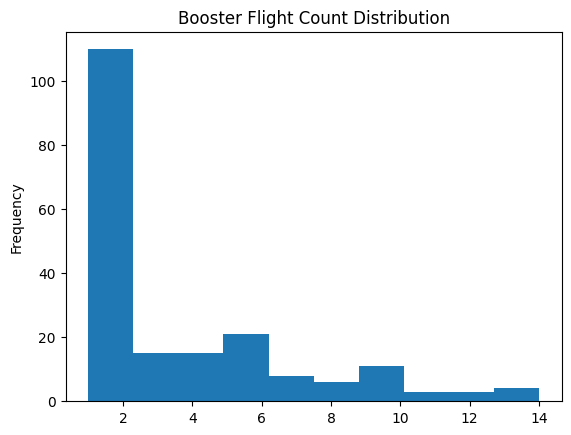

In [24]:
final_df['core_flight'].plot(kind='hist', bins=10, title='Booster Flight Count Distribution')


<Axes: title={'center': 'Payload Mass Distribution'}, ylabel='Frequency'>

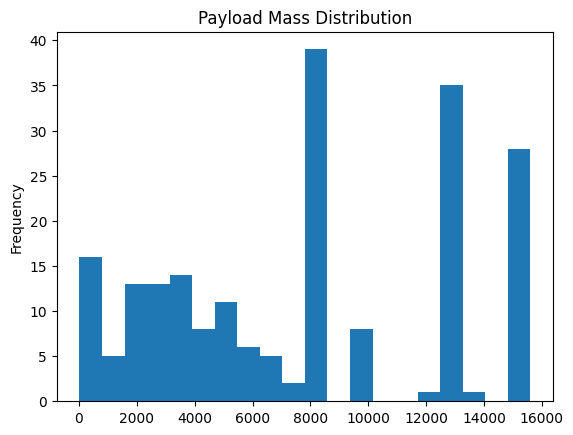

In [25]:
final_df['payload_mass_kg'].plot(kind='hist', bins=20, title='Payload Mass Distribution')


<Axes: title={'center': 'Payload Orbit Types'}, xlabel='payload_orbit'>

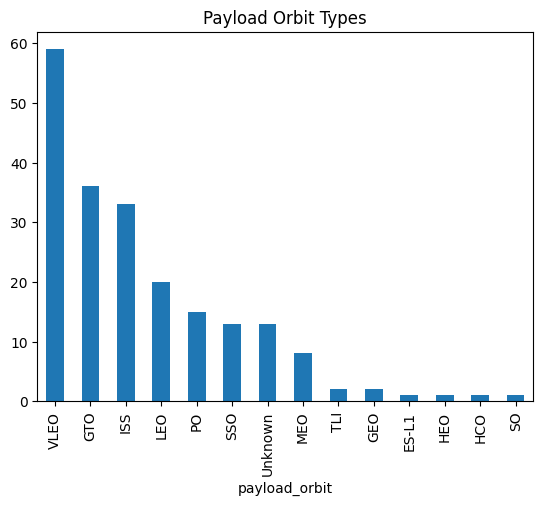

In [26]:
final_df['payload_orbit'].value_counts().plot(kind='bar', title='Payload Orbit Types')


#Summary of Data Wrangling Results

After cleaning and transforming the SpaceX launch dataset, a structured dataframe was created containing key information about launches, booster performance, and payload details.
Missing values were handled by replacing undefined payload masses with the mean value and filling missing text descriptions with a default message. Payload details were retrieved directly from the SpaceX API using payload IDs.
The final dataset includes 13 essential fields that summarize launch success, booster reuse behavior, landing attempts, and payload characteristics. This cleaned dataset can now be used for exploratory data analysis, visualization, and predictive modeling.